<a href="https://colab.research.google.com/github/Felixwkk/food-classificaion/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://ncov.dxy.cn/ncovh5/view/pneumonia
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)
from matplotlib import pyplot as plt

headers = {'Accept-Language': 'en-US,en;q=0.8'}

page = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia', headers=headers)
soup = BeautifulSoup(page.content, "html.parser")


In [4]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.Tag]

In [0]:
html = soup.find('body').get_text()

In [6]:
html 

'try { window.getListByCountryTypeService2 = [{"id":953,"createTime":1580027704000,"modifyTime":1580961474000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"6","provinceName":"日本","provinceShortName":"","cityName":"","confirmedCount":45,"suspectedCount":0,"curedCount":1,"deadCount":0,"comment":"","sort":0,"operator":"xuyt","locationId":951002},{"id":950,"createTime":1580027655000,"modifyTime":1580920030000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"3","provinceName":"新加坡","provinceShortName":"","cityName":"","confirmedCount":28,"suspectedCount":0,"curedCount":0,"deadCount":0,"comment":"","sort":0,"operator":"xuyt","locationId":952009},{"id":949,"createTime":1580027637000,"modifyTime":1580830169000,"tags":"","countryType":2,"continents":"亚洲","provinceId":"2","provinceName":"泰国","provinceShortName":"","cityName":"","confirmedCount":25,"suspectedCount":0,"curedCount":5,"deadCount":0,"comment":"","sort":0,"operator":"xuyt","locationId":952010},{"id":954,"createTim

In [0]:
html = html.split('tags') # convert to a list of records
del html[0] # remove the first row

In [0]:
rows = ['Country Type', 'Continents', 'Province Name', 'Province Short Name', 'City Name', 'ConfirmedCount','SuspectedCount', 'CuredCount','DeadCount']

In [9]:
table = pd.DataFrame(sub.split(',') for sub in html) # split by commas
row_val, column_val = table.shape
column_val

3022

In [10]:
table = table.drop(columns=0) # remove not required first columns
table.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021
0,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""6""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":45","""suspectedCount"":0","""curedCount"":1","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""xuyt""","""locationId"":951002}","{""id"":950","""createTime"":1580027655000","""modifyTime"":1580920030000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""3""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":28","""suspectedCount"":0","""curedCount"":0","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""xuyt""","""locationId"":952009}","{""id"":949","""createTime"":1580027637000","""modifyTime"":1580830169000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""2""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":25","""suspectedCount"":0","""curedCount"":5","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""xuyt""","""locationId"":952010}","{""id"":954","""createTime"":1580027721000","""modifyTime"":1580957000000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"""countryType"":2","""continents"":""亚洲""","""provinceId"":""7""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":23","""suspectedCount"":0","""curedCount"":0","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""xuyt""","""locationId"":951004}","{""id"":958","""createTime"":1580027777000","""modifyTime"":1580961486000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"""countryType"":2","""continents"":""大洋洲""","""provinceId"":""10""","""provinceName"":""澳大利亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":14","""suspectedCount"":0","""curedCount"":2","""deadCount"":0","""comment"":""""","""sort"":0","""operator"":""xuyt""","""locationId"":990001}","{""id"":951","""createTime"":1580027668000","""modifyTime"":1580916801000","""",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
table.drop(table.columns[10:column_val], axis = 1, inplace = True)

In [12]:
table.drop(columns = 3, inplace = True)
table.head()

,1,2,4,5,6,7,8,9,10
0,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":45","""suspectedCount"":0","""curedCount"":1","""deadCount"":0"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":28","""suspectedCount"":0","""curedCount"":0","""deadCount"":0"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":25","""suspectedCount"":0","""curedCount"":5","""deadCount"":0"
3,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":23","""suspectedCount"":0","""curedCount"":0","""deadCount"":0"
4,"""countryType"":2","""continents"":""大洋洲""","""provinceName"":""澳大利亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":14","""suspectedCount"":0","""curedCount"":2","""deadCount"":0"


In [0]:
table.columns = rows

In [14]:
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""日本""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":45","""suspectedCount"":0","""curedCount"":1","""deadCount"":0"
1,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""新加坡""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":28","""suspectedCount"":0","""curedCount"":0","""deadCount"":0"
2,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""泰国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":25","""suspectedCount"":0","""curedCount"":5","""deadCount"":0"
3,"""countryType"":2","""continents"":""亚洲""","""provinceName"":""韩国""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":23","""suspectedCount"":0","""curedCount"":0","""deadCount"":0"
4,"""countryType"":2","""continents"":""大洋洲""","""provinceName"":""澳大利亚""","""provinceShortName"":""""","""cityName"":""""","""confirmedCount"":14","""suspectedCount"":0","""curedCount"":2","""deadCount"":0"


In [15]:

table['Country Type'] = table["Country Type"].str.replace('"countryType":', "")
table['Continents'] = table['Continents'].str.replace('"continents":"','')
table['Continents'] = table['Continents'].str.replace('"','')
table['Province Name'] = table['Province Name'].str.replace('"provinceName":"','')
table['Province Name'] = table['Province Name'].str.replace('"','')
table['Province Short Name']= table['Province Short Name'].str.replace('"provinceShortName":','')
table['City Name'] = table['City Name'].str.replace('"cityName":','')
table['ConfirmedCount']= table['ConfirmedCount'].str.replace('"confirmedCount":','')
table['SuspectedCount']= table['SuspectedCount'].str.replace('"suspectedCount":','')
table['CuredCount']=table['CuredCount'].str.replace('"curedCount":','')
table['DeadCount']= table['DeadCount'].str.replace('"deadCount":','')
table.head()

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,亚洲,日本,"""""","""""",45,0,1,0
1,2,亚洲,新加坡,"""""","""""",28,0,0,0
2,2,亚洲,泰国,"""""","""""",25,0,5,0
3,2,亚洲,韩国,"""""","""""",23,0,0,0
4,2,大洋洲,澳大利亚,"""""","""""",14,0,2,0


In [0]:
table['Continents'] = table['Continents'].str.replace('亚洲','Asia')
table['Continents'] = table['Continents'].str.replace('大洋洲', 'Oceania')
table['Continents'] = table['Continents'].str.replace('北美洲', 'North Americas')
table['Continents'] = table['Continents'].str.replace('欧洲', 'Europe')



table['Province Name'] = table['Province Name'].str.replace('日本','Japan')
table['Province Name'] = table['Province Name'].str.replace('泰国','Thailand')
table['Province Name'] = table['Province Name'].str.replace('新加坡', 'Singapore')
table['Province Name'] = table['Province Name'].str.replace('韩国','Korea')
table['Province Name'] = table['Province Name'].str.replace('澳大利亚','Australia')
table['Province Name'] = table['Province Name'].str.replace('德国','Germany')
table['Province Name'] = table['Province Name'].str.replace('美国', 'USA')
table['Province Name'] = table['Province Name'].str.replace('马来西亚', 'Malaysia')
table['Province Name'] = table['Province Name'].str.replace('法国','France')
table['Province Name'] = table['Province Name'].str.replace('越南', 'Vietnam')
table['Province Name'] = table['Province Name'].str.replace('阿联酋','United Arab Emirates')
table['Province Name'] = table['Province Name'].str.replace('加拿大','Canada')
table['Province Name'] = table['Province Name'].str.replace('印度','India')
table['Province Name'] = table['Province Name'].str.replace('意大利', 'Itlay')
table['Province Name'] = table['Province Name'].str.replace('英国', 'England')
table['Province Name'] = table['Province Name'].str.replace('俄罗斯','Russia')
table['Province Name'] = table['Province Name'].str.replace('菲律宾', 'Philippines')
table['Province Name'] = table['Province Name'].str.replace('尼泊尔','Nepal')
table['Province Name'] = table['Province Name'].str.replace('柬埔寨','Cambodia')
table['Province Name'] = table['Province Name'].str.replace('斯里兰卡', 'Sri Lanka')
table['Province Name'] = table['Province Name'].str.replace('芬兰', 'Finland')
table['Province Name'] = table['Province Name'].str.replace('西班牙', 'Spain')
table['Province Name'] = table['Province Name'].str.replace('瑞典','Sweden')
table['Province Name'] = table['Province Name'].str.replace('比利时', 'Belgium')
table['Province Name'] = table['Province Name'].str.replace('青海省', '青海省 Qing Hai')
table['Province Name'] = table['Province Name'].str.replace('新疆维吾尔自治区', '新疆维吾尔自治区 Xinjiang Uygur')
table['Province Name'] = table['Province Name'].str.replace('宁夏回族自治区', '宁夏回族自治区 Ningxia Hui')
table['Province Name'] = table['Province Name'].str.replace('内蒙古自治区', '内蒙古自治区 Inner Mongolia')
table['Province Name'] = table['Province Name'].str.replace('西藏自治区', '西藏自治区 Tibet')
table['Province Name'] = table['Province Name'].str.replace('台湾', '台湾 Taiwan')
table['Province Name'] = table['Province Name'].str.replace('澳门','澳门 Macao')
table['Province Name'] = table['Province Name'].str.replace('香港','香港 Hong Kong')
table['Province Name'] = table['Province Name'].str.replace('吉林省','吉林省 Jilin')
table['Province Name'] = table['Province Name'].str.replace('甘肃省','甘肃省 Gansu')
table['Province Name'] = table['Province Name'].str.replace('贵州省', '贵州省 GuiZhou')
table['Province Name'] = table['Province Name'].str.replace('天津市','天津市 TianJin')
table['Province Name'] = table['Province Name'].str.replace('辽宁省', '辽宁省 Liao Ning')
table['Province Name'] = table['Province Name'].str.replace('山西省', '山西省 Shanxi')
table['Province Name'] = table['Province Name'].str.replace('海南省', '海南省 Hainan')
table['Province Name'] = table['Province Name'].str.replace('云南省','云南省 Yunnan')
table['Province Name'] = table['Province Name'].str.replace('河北省', '河北省 Hebei')
table['Province Name'] = table['Province Name'].str.replace('广西壮族自治区', '广西壮族自治区 GuangXi Zhuang')
table['Province Name'] = table['Province Name'].str.replace('陕西省', '陕西省 ShaanXi')
table['Province Name'] = table['Province Name'].str.replace('黑龙江省', '黑龙江省 HeiLongJiang')
table['Province Name'] = table['Province Name'].str.replace('福建省','福建省 FuJian')
table['Province Name'] = table['Province Name'].str.replace('北京市', '北京市 Beijing')
table['Province Name'] = table['Province Name'].str.replace('上海市','上海市 Shanghai')
table['Province Name'] = table['Province Name'].str.replace('山东省', '山东省 ShanDong')
table['Province Name'] = table['Province Name'].str.replace('四川省','四川省 Sichuan')
table['Province Name'] = table['Province Name'].str.replace('江苏省', '江苏省 JiangSu')
table['Province Name'] = table['Province Name'].str.replace('重庆市', '重庆市 Chong Qing')
table['Province Name'] = table['Province Name'].str.replace('江西省', '江西省 JiangXi')
table['Province Name'] = table['Province Name'].str.replace('安徽省', '安徽省 AnHui')
table['Province Name'] = table['Province Name'].str.replace('湖南省', '湖南省 Hunan')
table['Province Name'] = table['Province Name'].str.replace('河南省','河南省	Henan')
table['Province Name'] = table['Province Name'].str.replace('广东省','广东省 GuangDong')
table['Province Name'] = table['Province Name'].str.replace('浙江省', '浙江省 ZheJiang')
table['Province Name'] = table['Province Name'].str.replace('湖北省', '湖北省 Hubei')



In [17]:
table

,Country Type,Continents,Province Name,Province Short Name,City Name,ConfirmedCount,SuspectedCount,CuredCount,DeadCount
0,2,Asia,Japan,"""""","""""",45,0,1,0
1,2,Asia,Singapore,"""""","""""",28,0,0,0
2,2,Asia,Thailand,"""""","""""",25,0,5,0
3,2,Asia,Korea,"""""","""""",23,0,0,0
4,2,Oceania,Australia,"""""","""""",14,0,2,0
5,2,Asia,Malaysia,"""""","""""",12,0,0,0
6,2,North Americas,USA,"""""","""""",12,0,0,0
7,2,Europe,Germany,"""""","""""",12,0,0,0
8,2,Asia,Vietnam,"""""","""""",10,0,1,0
9,2,Europe,France,"""""","""""",6,0,0,0


In [0]:
table['Continents'] = table['Continents'].str.replace('','China')

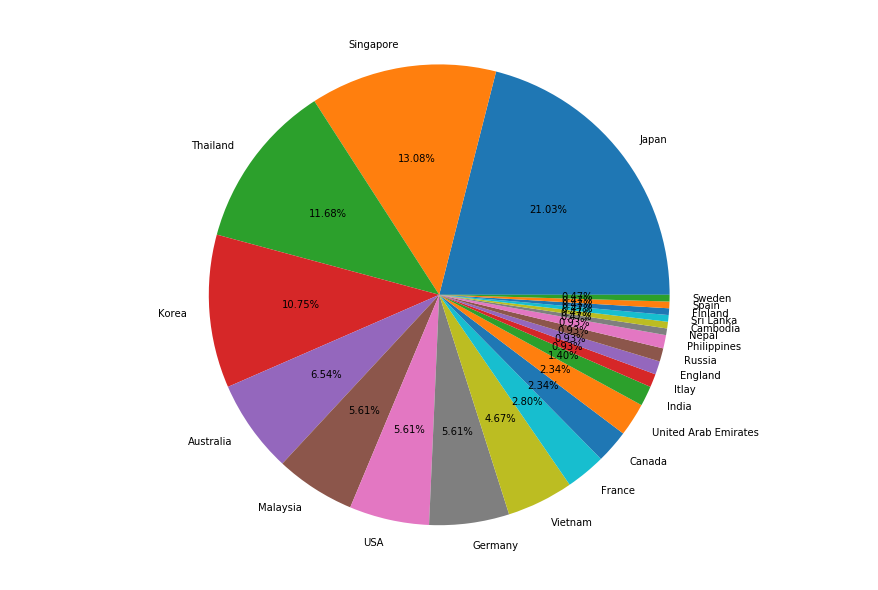

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = table['Province Name'][0:23]
students = table['ConfirmedCount'][0:23]
ax.pie(students, labels = langs,
       autopct='%1.2f%%'
       )

#plt.pie(table['Continents', table['ConfirmedCount']])
plt.show()

<BarContainer object of 58 artists>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 34255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27835 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 28595 missing from current font.
  font.set_

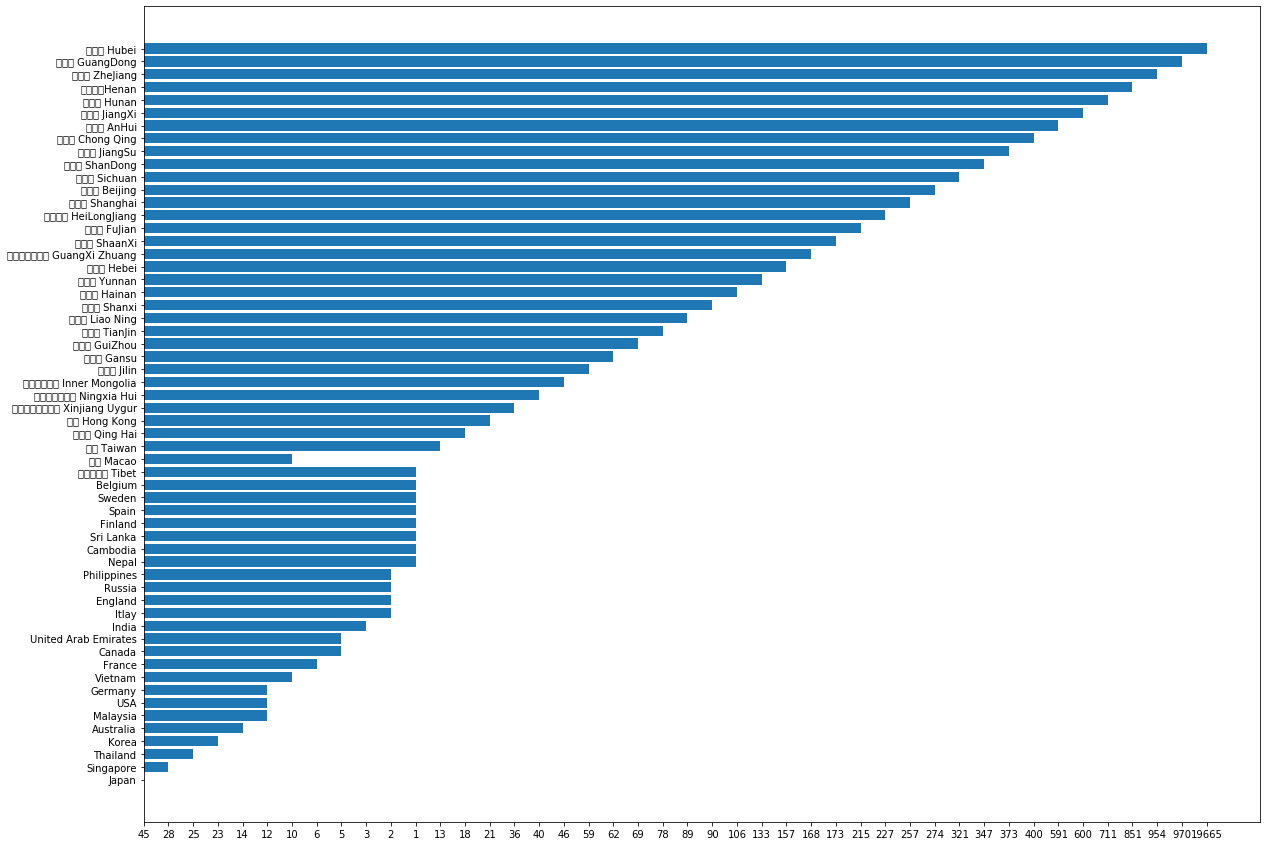

In [20]:
plt.figure(figsize = (20,15))
plt.barh(table['Province Name'],table['ConfirmedCount'])

In [21]:
! pip install pyplotz

  Created wheel for pyplotz: filename=pyplotz-0.24-cp36-none-any.whl size=3666 sha256=e075fd202dd7cbbafea81682a1ef3c131bf3bf2d4d968d7f74f9460c6263bb29
  Stored in directory: /root/.cache/pip/wheels/c2/60/51/0dd5298dfbd33ea0dc7fa6e860903199d685249a1ab3362c89
Successfully built pyplotz


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
path = 'chinese.simhei.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

mpl.rcParams['font.sans-serif'] = ['chinese.simhei.ttf']
mpl.rcParams['font.serif'] = ['chinese.SimHei.ttf']

plt.rcParams['axes.unicode_minus'] = False
figure = plt.figure(figsize=(38,14),dpi=80)
#ax = figure.add_axes((0.1, 0.1, 0.8, 0.8))
plt.plot(table['Province Name'],table['ConfirmedCount'], color=(1, 0, 0, 1), linewidth=2.0, label='实际值', 
          )
#plt.plot(X_test,test_predict, 'c*-', color=(0, 0, 1, 1), linewidth=2.0, label='预测值')

plt.title("模型结果",fontproperties=fontprop)
plt.xlabel("X值",fontproperties=fontprop)
plt.ylabel("Y值",fontproperties=fontprop)
plt.legend(loc = "lower left",prop=fontprop)
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['chinese.simhei', 'Arial']})
plt.show()

NameError: ignored

try downloading
start downloading default chinese font(only for first time)
downloading complete
Font installed at the first time


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


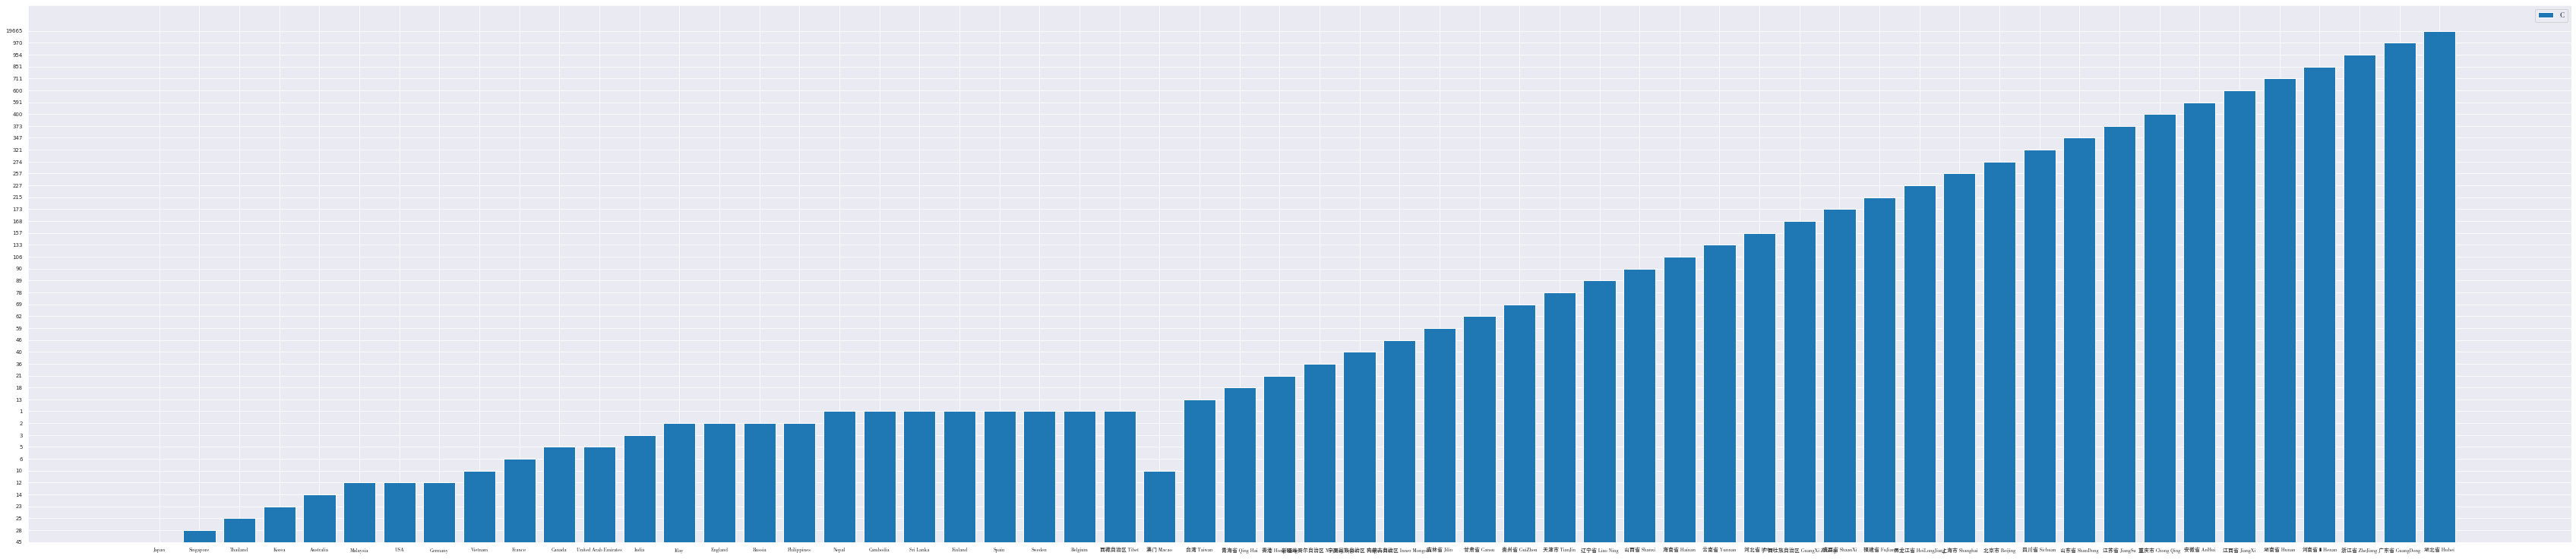

In [26]:
from pyplotz.pyplotz import PyplotZ
pltz = PyplotZ()
pltz.enable_chinese()
pltz.set_figure_size(60,13)
pltz.bar(table['Province Name'],table['ConfirmedCount'])

pltz.xticks(np.arange(len(table['Province Name'])),table['Province Name'],rotation=360)
pltz.legend('Confirmed Count')
pltz.automate_font_size(scale=.2) 
pltz.show()

In [128]:
# upload the csv file into colab
filename = 'time_series_2019-ncov - Confirmed.csv'

data = pd.read_csv(filename)

data.head()

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 10:00 PM,1/22/2020 12:00 PM,1/23/2020 12:00 PM,1/24/2020 12:00 AM,1/24/2020 12:00 PM,1/25/2020 12:00 AM,1/25/2020 12:00 PM,1/25/2020 10:00 PM,1/26/2020 11:00 AM,1/26/2020 11:00 PM,1/27/2020 9:00 AM,1/27/2020 7:00 PM,1/27/2020 8:30 PM,1/28/2020 1:00 PM,1/28/2020 6:00 PM,1/28/2020 11:00 PM,1/29/2020 1:30 PM,1/29/2020 2:30 PM,1/29/2020 9:00 PM,1/30/2020 11:00 AM,1/31/2020 2:00 PM,1/31/2020 7:00 PM,2/1/2020 10:00 AM,2/2/2020 9:00 PM,2/3/2020 9:00 PM,2/4/2020 9:40 AM,2/4/2020 10:00 PM,2/5/2020 9:00 AM
0,Anhui,Mainland China,1/3/2020,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0
1,Beijing,Mainland China,1/3/2020,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0
2,Chongqing,Mainland China,1/3/2020,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,238.0,247.0,300.0,337.0,337.0,366.0,376.0
3,Fujian,Mainland China,1/3/2020,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0
4,Gansu,Mainland China,1/3/2020,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,35.0,51.0,55.0,55.0,57.0,57.0


In [0]:
data.drop([ 'First confirmed date in country (Est.)','Lat', 'Long'], axis = 1, inplace=True)

In [130]:
data.fillna(0.0, inplace = True)
data.head()

,Province/State,Country/Region,1/21/2020 10:00 PM,1/22/2020 12:00 PM,1/23/2020 12:00 PM,1/24/2020 12:00 AM,1/24/2020 12:00 PM,1/25/2020 12:00 AM,1/25/2020 12:00 PM,1/25/2020 10:00 PM,1/26/2020 11:00 AM,1/26/2020 11:00 PM,1/27/2020 9:00 AM,1/27/2020 7:00 PM,1/27/2020 8:30 PM,1/28/2020 1:00 PM,1/28/2020 6:00 PM,1/28/2020 11:00 PM,1/29/2020 1:30 PM,1/29/2020 2:30 PM,1/29/2020 9:00 PM,1/30/2020 11:00 AM,1/31/2020 2:00 PM,1/31/2020 7:00 PM,2/1/2020 10:00 AM,2/2/2020 9:00 PM,2/3/2020 9:00 PM,2/4/2020 9:40 AM,2/4/2020 10:00 PM,2/5/2020 9:00 AM
0,Anhui,Mainland China,0.0,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0
1,Beijing,Mainland China,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0
2,Chongqing,Mainland China,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,110.0,110.0,132.0,132.0,132.0,147.0,147.0,147.0,165.0,182.0,211.0,238.0,247.0,300.0,337.0,337.0,366.0,376.0
3,Fujian,Mainland China,0.0,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,56.0,59.0,59.0,80.0,80.0,82.0,84.0,84.0,101.0,101.0,120.0,120.0,144.0,159.0,179.0,179.0,194.0,205.0
4,Gansu,Mainland China,0.0,0.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,14.0,14.0,19.0,19.0,19.0,24.0,24.0,24.0,26.0,26.0,29.0,35.0,35.0,51.0,55.0,55.0,57.0,57.0


<Figure size 2000x800 with 0 Axes>

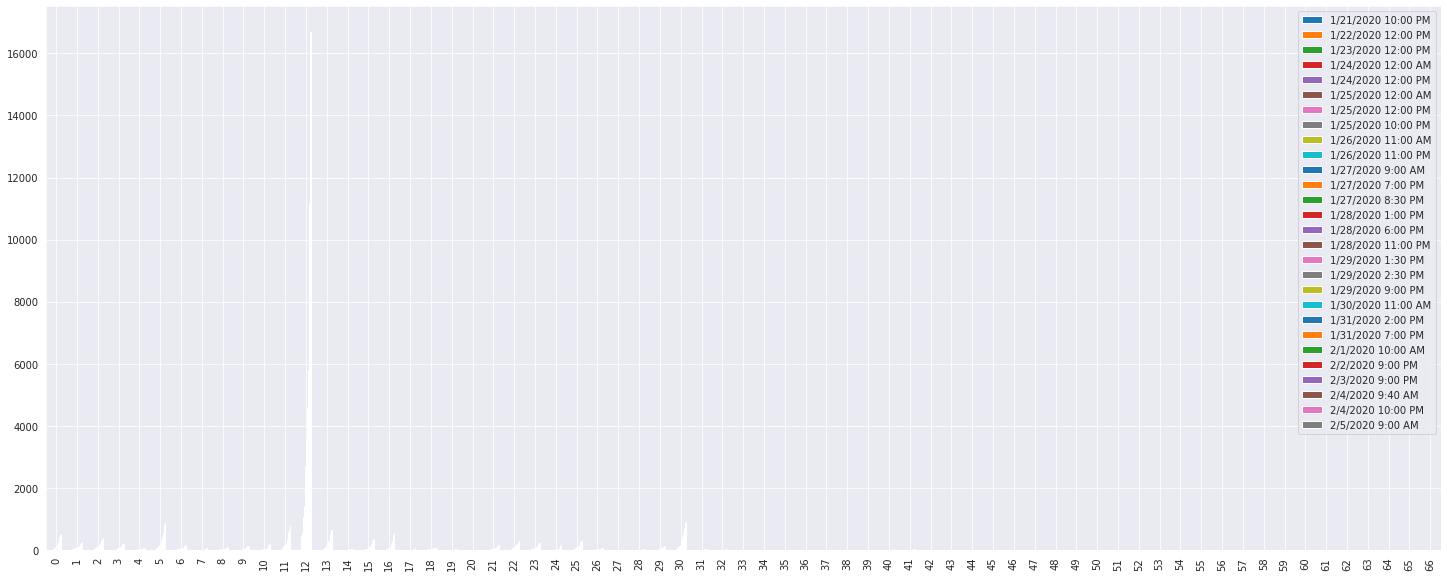

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10), dpi= 80)

data.iloc[:,1:].plot.bar(figsize=(25,10))
plt.xlabel=data['Country/Region']
plt.show()

In [132]:
data.iloc[12,1:]

Country/Region        Mainland China
1/21/2020 10:00 PM               270
1/22/2020 12:00 PM               444
1/23/2020 12:00 PM               444
1/24/2020 12:00 AM               549
1/24/2020 12:00 PM               549
1/25/2020 12:00 AM               729
1/25/2020 12:00 PM               761
1/25/2020 10:00 PM              1052
1/26/2020 11:00 AM              1058
1/26/2020 11:00 PM              1423
1/27/2020 9:00 AM               1423
1/27/2020 7:00 PM               1423
1/27/2020 8:30 PM               2714
1/28/2020 1:00 PM               2714
1/28/2020 6:00 PM               3554
1/28/2020 11:00 PM              3554
1/29/2020 1:30 PM               3554
1/29/2020 2:30 PM               3554
1/29/2020 9:00 PM               4586
1/30/2020 11:00 AM              4903
1/31/2020 2:00 PM               5806
1/31/2020 7:00 PM               7153
2/1/2020 10:00 AM               7153
2/2/2020 9:00 PM               11177
2/3/2020 9:00 PM               13522
2/4/2020 9:40 AM               13522
2

In [133]:
data.describe()

,1/21/2020 10:00 PM,1/22/2020 12:00 PM,1/23/2020 12:00 PM,1/24/2020 12:00 AM,1/24/2020 12:00 PM,1/25/2020 12:00 AM,1/25/2020 12:00 PM,1/25/2020 10:00 PM,1/26/2020 11:00 AM,1/26/2020 11:00 PM,1/27/2020 9:00 AM,1/27/2020 7:00 PM,1/27/2020 8:30 PM,1/28/2020 1:00 PM,1/28/2020 6:00 PM,1/28/2020 11:00 PM,1/29/2020 1:30 PM,1/29/2020 2:30 PM,1/29/2020 9:00 PM,1/30/2020 11:00 AM,1/31/2020 2:00 PM,1/31/2020 7:00 PM,2/1/2020 10:00 AM,2/2/2020 9:00 PM,2/3/2020 9:00 PM,2/4/2020 9:40 AM,2/4/2020 10:00 PM,2/5/2020 9:00 AM
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,4.925373,8.283582,9.761194,13.149254,14.044776,20.194030,21.402985,30.059701,31.611940,41.701493,43.074627,43.671642,66.761194,70.000000,83.253731,90.402985,92.029851,92.044776,116.194030,122.910448,147.417910,169.746269,179.462687,258.134328,301.447761,307.298507,365.716418,367.268657
std,32.986826,54.182857,54.195798,67.194258,67.189112,89.405484,93.201161,129.146368,129.939958,174.825975,174.826521,174.871848,331.137209,331.386984,433.170529,434.374683,434.544832,434.541780,560.990094,599.450398,710.410448,873.156627,874.537598,1364.257706,1649.174966,1650.126947,2034.140939,2034.155827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,9.000000,11.000000,11.000000,12.000000,15.000000,15.000000,15.000000,17.000000,17.000000
75%,0.000000,1.500000,3.500000,4.500000,6.500000,9.500000,16.000000,16.500000,21.500000,22.000000,30.000000,30.000000,33.000000,42.000000,42.000000,46.000000,51.500000,51.500000,55.500000,64.000000,70.500000,85.000000,93.500000,109.000000,127.000000,132.500000,142.500000,142.500000
max,270.000000,444.000000,444.000000,549.000000,549.000000,729.000000,761.000000,1052.000000,1058.000000,1423.000000,1423.000000,1423.000000,2714.000000,2714.000000,3554.000000,3554.000000,3554.000000,3554.000000,4586.000000,4903.000000,5806.000000,7153.000000,7153.000000,11177.000000,13522.000000,13522.000000,16678.000000,16678.000000


In [0]:
df = data.T # transpose rows to columns



In [135]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
2/2/2020 9:00 PM,408,191,300,159,51,683,127,46,71,113,95,566,11177,521,27,271,391,31,70,28,11,116,246,193,66,254,48,1,24,105,724,19,20,15,10,1,2,4,1,8,15,18,6,6,1,8,3,1,4,4,2,1,1,10,1,5,2,2,2,2,2,1,1,2,1,0,0
2/3/2020 9:00 PM,480,212,337,179,55,725,139,56,79,126,155,675,13522,521,34,308,391,42,74,31,13,128,270,208,74,254,60,1,24,117,724,19,20,15,10,1,2,4,1,8,15,18,8,6,1,8,3,1,4,4,2,1,1,10,1,5,2,2,2,2,2,1,1,2,1,0,0
2/4/2020 9:40 AM,480,212,337,179,55,797,139,56,79,126,155,675,13522,593,34,308,476,42,74,34,15,142,270,208,74,282,60,1,29,117,829,19,20,15,10,1,2,6,1,8,15,18,8,6,1,8,3,1,4,4,2,1,1,12,1,5,2,3,2,2,2,1,1,2,1,1,0
2/4/2020 10:00 PM,530,228,366,194,57,870,150,64,91,135,190,764,16678,661,42,341,548,54,81,34,17,81,298,233,165,301,67,1,32,122,895,25,22,16,11,1,2,6,1,10,18,24,8,6,1,10,3,1,4,4,3,1,1,12,1,5,2,3,2,2,2,1,1,2,1,1,0
2/5/2020 9:00 AM,530,253,376,205,57,895,150,64,91,135,190,764,16678,661,42,341,548,54,88,34,17,165,307,243,81,301,69,1,32,124,895,25,22,16,11,1,2,6,1,10,21,24,8,6,1,10,3,1,4,4,3,1,1,12,1,5,2,3,2,2,2,1,1,2,1,1,0


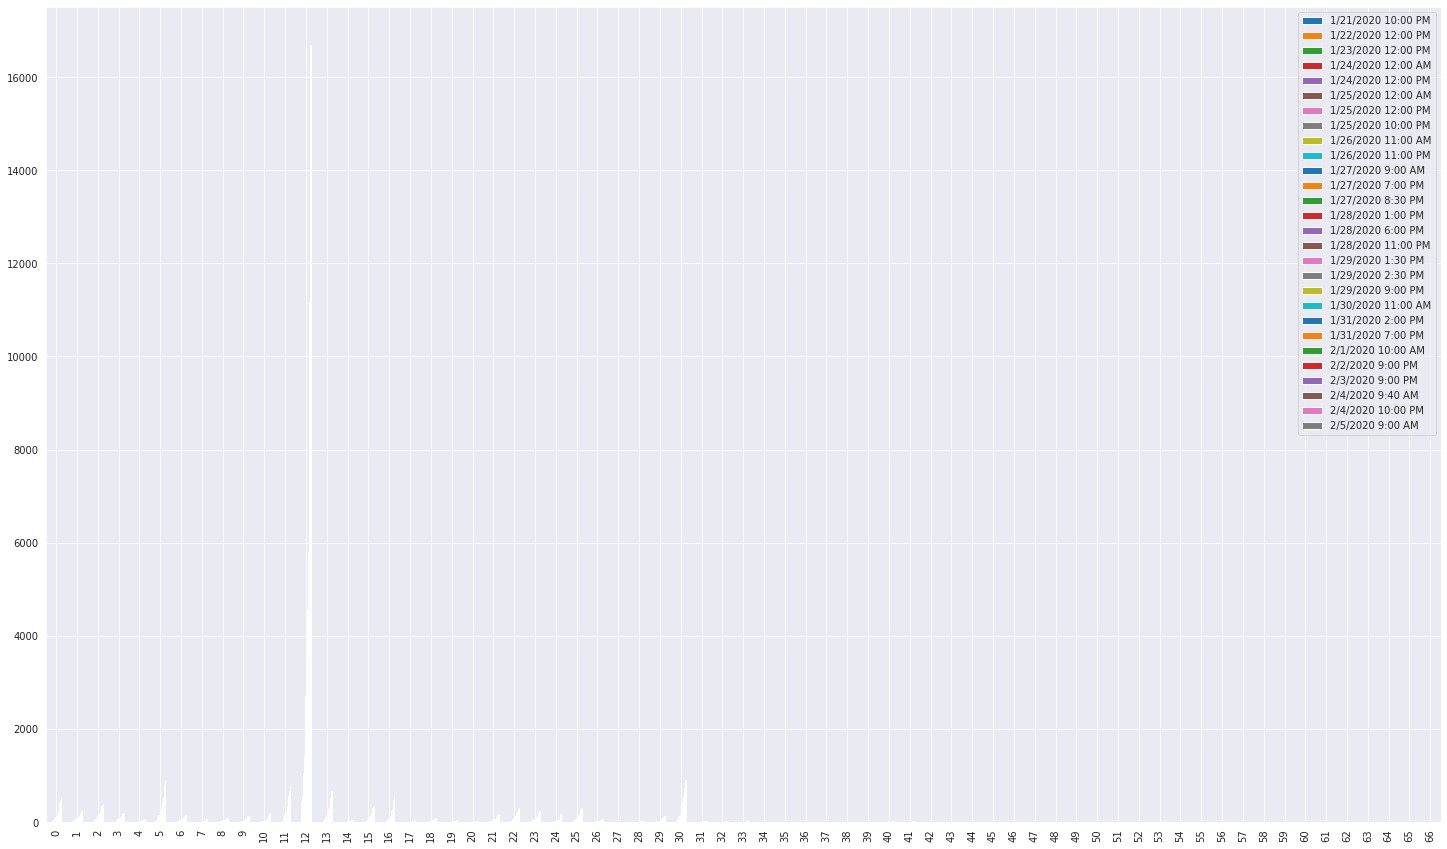

In [136]:
data.plot(figsize=(25,15),kind = 'bar')

In [137]:
len(df[0])

30

In [0]:
# taking the first province as a subject

df_test = df[0]


In [139]:
df_test.shape

(30,)

In [106]:
!  pip install pmdarima

     |████████████████████████████████| 1.5MB 7.5MB/s 


In [140]:
df_test

Province/State                 Anhui
Country/Region        Mainland China
1/21/2020 10:00 PM                 0
1/22/2020 12:00 PM                 1
1/23/2020 12:00 PM                 9
1/24/2020 12:00 AM                15
1/24/2020 12:00 PM                15
1/25/2020 12:00 AM                39
1/25/2020 12:00 PM                39
1/25/2020 10:00 PM                60
1/26/2020 11:00 AM                60
1/26/2020 11:00 PM                70
1/27/2020 9:00 AM                 70
1/27/2020 7:00 PM                 70
1/27/2020 8:30 PM                106
1/28/2020 1:00 PM                106
1/28/2020 6:00 PM                106
1/28/2020 11:00 PM               152
1/29/2020 1:30 PM                152
1/29/2020 2:30 PM                152
1/29/2020 9:00 PM                200
1/30/2020 11:00 AM               200
1/31/2020 2:00 PM                237
1/31/2020 7:00 PM                237
2/1/2020 10:00 AM                297
2/2/2020 9:00 PM                 408
2/3/2020 9:00 PM                 480
2

Anhui Mainland China


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.p

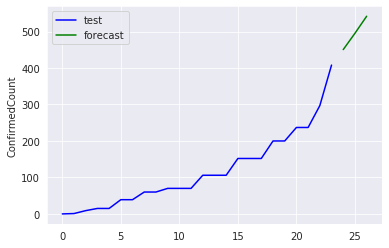

In [107]:
country = df_test[0]
state = df_test[1]
print(country, state)
y = df_test.drop(['Province/State', 'Country/Region'], axis = 0)

import pmdarima as pm
from pmdarima.model_selection import train_test_split

train, test = train_test_split(y, train_size=24)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=1)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:24], train, c='blue')
plt.plot(x[24:], forecasts, c='green')
plt.ylabel('ConfirmedCount')
plt.legend(labels = ('test','forecast'))
plt.show()

<Figure size 720x360 with 0 Axes>

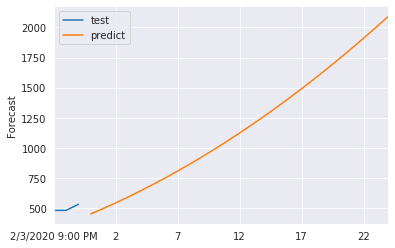

In [141]:
 # forecast next 25 days

future_forecast = model.predict(n_periods= 25)
# create a new dataframe for predicted numbers
future_forecast = pd.DataFrame(future_forecast,columns=['Prediction'])
# join the test and predicted model data into a single dataframe
newdata = pd.concat([test,future_forecast])
plt.figure(figsize=(10,5))
newdata.plot()
plt.ylabel('Forecast')
plt.legend(labels=('test','predict'))
plt.show()

Countrty : Anhui  state : Mainland China


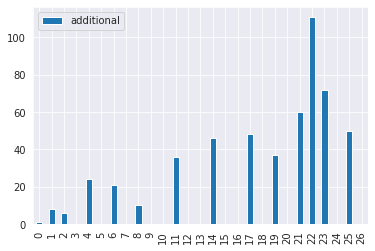

In [142]:
# find the delta in growth

def case_delta(country):
  first = df.iloc[2,country]
  countrytype = df.iloc[0,country]
  state = df.iloc[1,country]
  print('Countrty :' ,countrytype, ' state :' ,state)
  data_growth = []
  for x in df.iloc[3:,country]:
    y = x - first
    data_growth.append(y)
    first = x

  data_growth = pd.DataFrame(data_growth,  columns = ['additional'])
  data_growth.plot(kind='bar')

countryname = 0
case_delta(countryname)

In [143]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
Province/State,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,Heilongjiang,Henan,Hubei,Hunan,Inner Mongolia,Jiangsu,Jiangxi,Jilin,Liaoning,Ningxia,Qinghai,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang,0,0,0,Taiwan,Washington,Illinois,California,Arizona,Macau,Hong Kong,0,0,0,0,0,Ontario,British Columbia,New South Wales,Victoria,Queensland,0,0,0,0,0,0,0,0,0,0,0,0,South Australia,"Boston, MA",0,"Madison, WI"
Country/Region,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Mainland China,Thailand,Japan,South Korea,Taiwan,US,US,US,US,Macau,Hong Kong,Singapore,Vietnam,France,Nepal,Malaysia,Canada,Canada,Australia,Australia,Australia,Cambodia,Sri Lanka,Germany,Finland,United Arab Emirates,Philippines,India,Italy,UK,Russia,Sweden,Spain,Australia,US,Belgium,US


Countrty : 0.0  state : Singapore


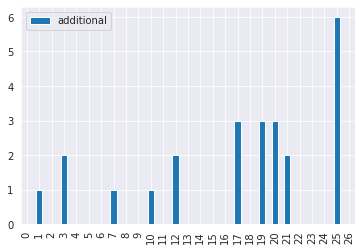

In [144]:
countryname=41
case_delta(countryname)

In [145]:
df[41]

Province/State                0
Country/Region        Singapore
1/21/2020 10:00 PM            0
1/22/2020 12:00 PM            0
1/23/2020 12:00 PM            1
1/24/2020 12:00 AM            1
1/24/2020 12:00 PM            3
1/25/2020 12:00 AM            3
1/25/2020 12:00 PM            3
1/25/2020 10:00 PM            3
1/26/2020 11:00 AM            4
1/26/2020 11:00 PM            4
1/27/2020 9:00 AM             4
1/27/2020 7:00 PM             5
1/27/2020 8:30 PM             5
1/28/2020 1:00 PM             7
1/28/2020 6:00 PM             7
1/28/2020 11:00 PM            7
1/29/2020 1:30 PM             7
1/29/2020 2:30 PM             7
1/29/2020 9:00 PM            10
1/30/2020 11:00 AM           10
1/31/2020 2:00 PM            13
1/31/2020 7:00 PM            16
2/1/2020 10:00 AM            18
2/2/2020 9:00 PM             18
2/3/2020 9:00 PM             18
2/4/2020 9:40 AM             18
2/4/2020 10:00 PM            24
2/5/2020 9:00 AM             24
Name: 41, dtype: object